In [1]:
from utils_data_reader import get_datasets_pytorch, prep_data_range, move_alt_axis_for_numpy
from utils_plot import *
from utils_optim import numpy_custom_loss, numpy_mape, numpy_mse
import numpy as np
from matplotlib.ticker import FormatStrFormatter
from utils_data_mapper import StandardScaler

# Step 1. Loading the Data

Loading ground truth (GT) data from 2017 and the neural network's output for the corresponding period.

In [2]:
gt_2017 = prep_data_range([2017])
pr_2017 = np.load('pr_2017.npy')

print(gt_2017.shape)
print(pr_2017.shape)

Loading data for year 2017
Concatenating data...
(8736, 24, 20, 36)
(8736, 24, 20, 36)


# Step 2. Preparing the index list for the chosen dates.

In [3]:
# dates to plot
dates = [[1, 1, 2017],
         [2, 1, 2017],
         [3, 1, 2017],
         [4, 1, 2017],
         [5, 1, 2017],
         [6, 1, 2017],
         [7, 1, 2017],]

# get indices for dates
date_idx_list = [calc_hour_index(date[0], date[1], date[2]) for date in dates]



# Step 3. Density Plots

For altittudes of 200Km, 300Km, and 400Km

Columns: 1st day of Jan - July 2017
Rows: GT, Prediction, MAPE

[0, 744, 1416, 2160, 2880, 3624, 4344]
[0, 744, 1416, 2160, 2880, 3624, 4344]
[0, 744, 1416, 2160, 2880, 3624, 4344]


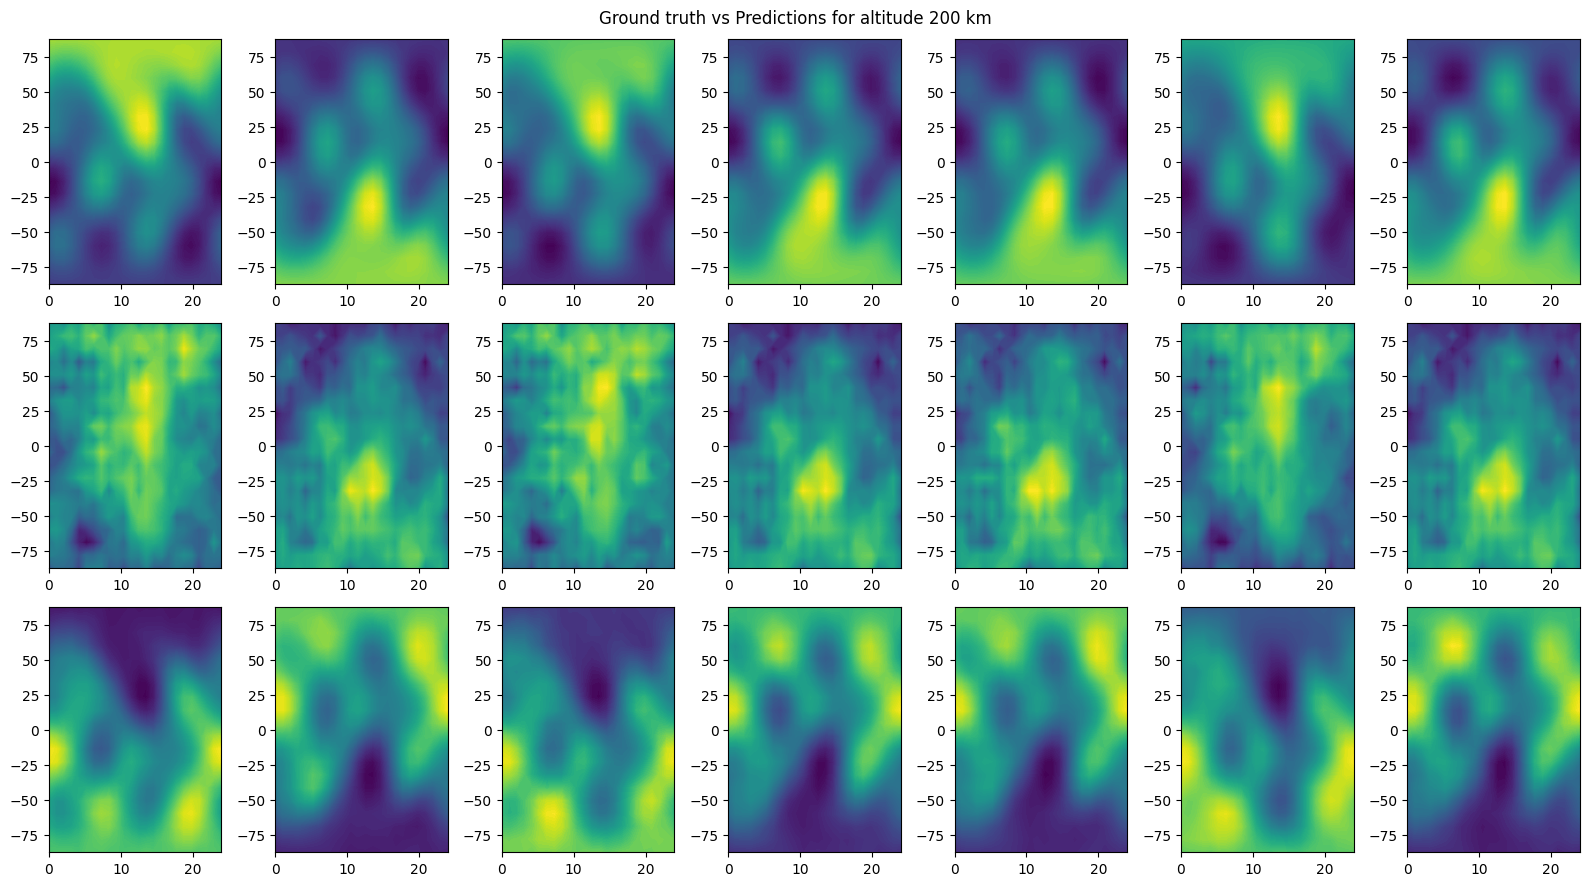

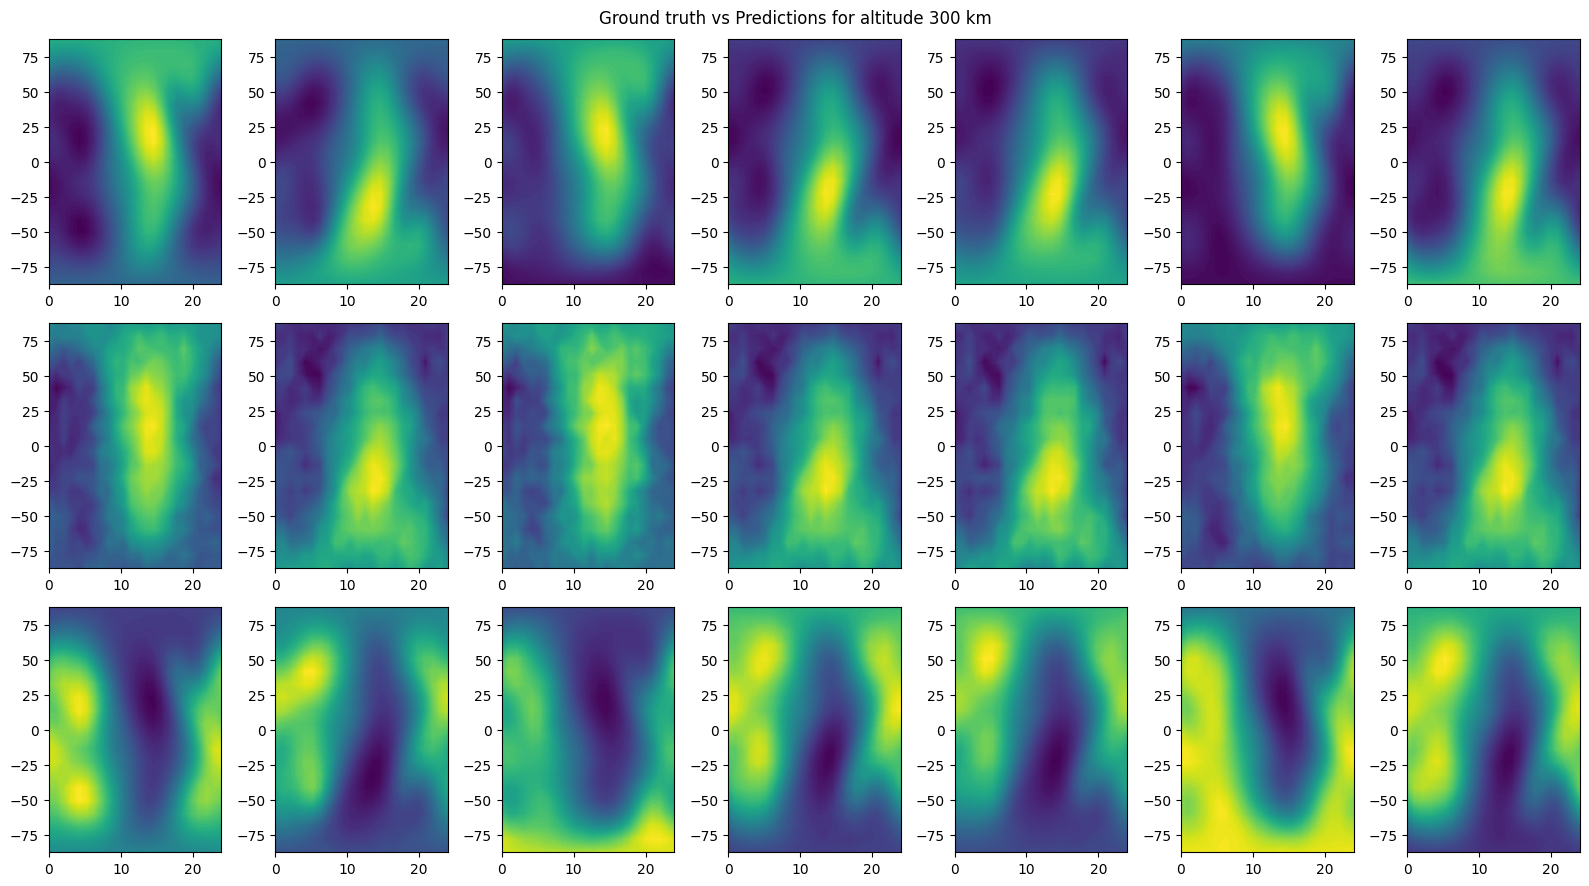

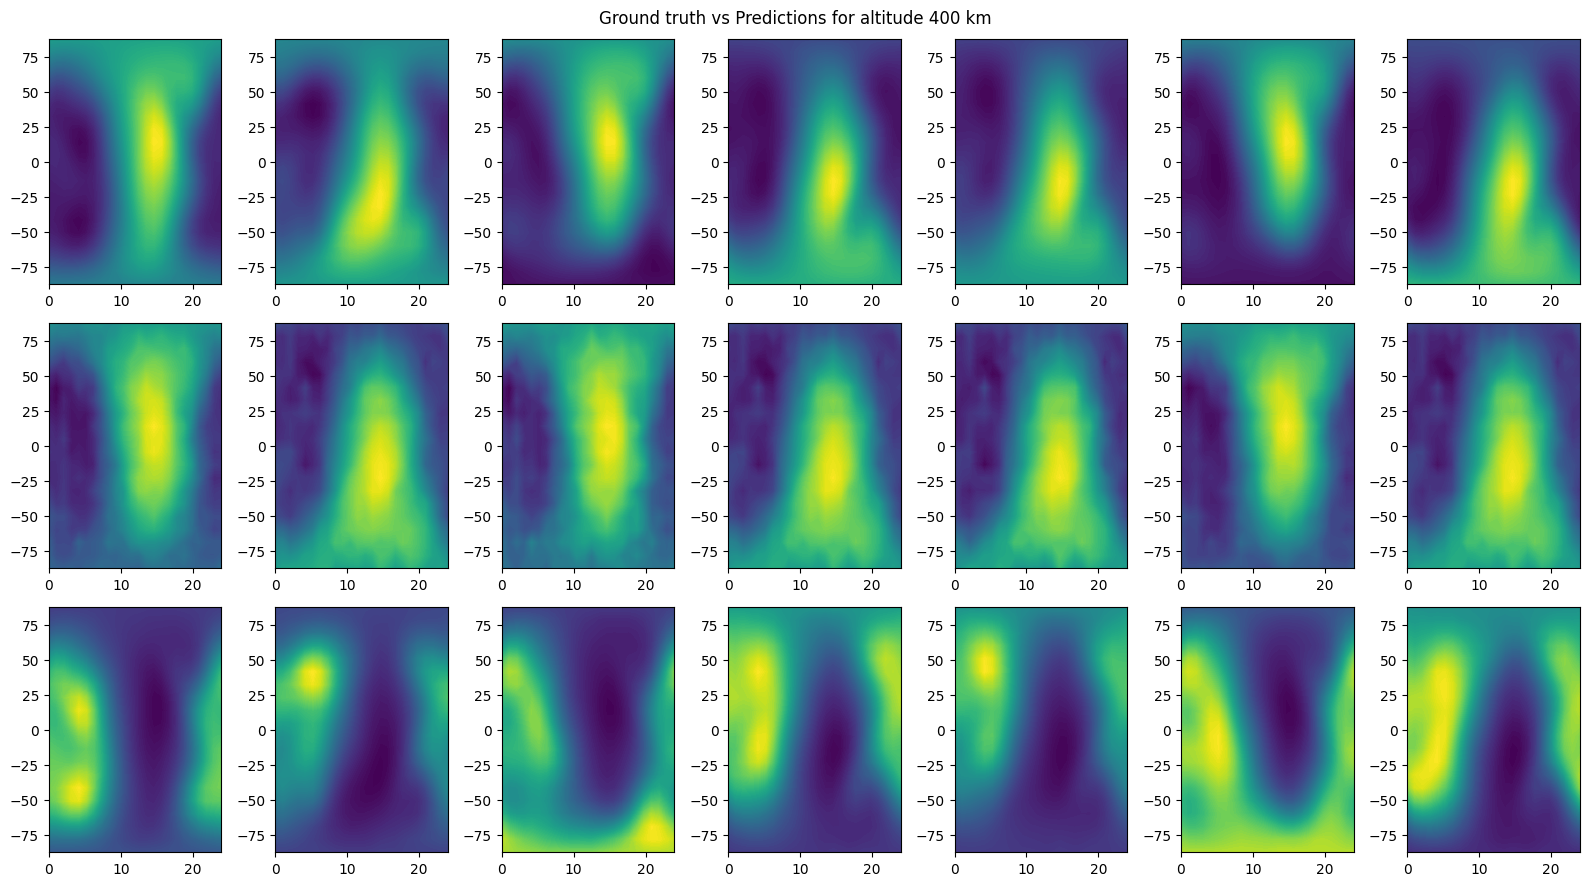

In [4]:

# plot
def plot_all(gt_dates:np.ndarray, pr_dates:np.ndarray, date_idx_list:List[int], alt:float):
    localSolarTimes = np.linspace(0, 24, 24) # 24 
    latitudes = np.linspace(-87.5, 87.5, 20) # 20
    altitudes = np.linspace(100, 800, 36)    # 36
    altitude_index = get_altitude_index(altitudes, alt)



    print(date_idx_list)
    N = len(date_idx_list)

    plt.figure(figsize=(16, 9))
    plt.suptitle(f'Ground truth vs Predictions for altitude {alt} km')

    for i in range(N):
        date_idx=date_idx_list[i]
        gt_rho = gt_dates[date_idx, :, :, altitude_index]
        gt_rho = np.power(10, gt_rho)

        pr_rho = pr_dates[date_idx, :, :, altitude_index]
        pr_rho = np.power(10, pr_rho)

        # Plot the gt data for the selected hour and altitude
        plt.subplot(3, 7, i+1)
        plt.contourf(localSolarTimes, latitudes, gt_rho.T, 100)
        

        # Plot the pr data for the selected hour and altitude
        plt.subplot(3, 7, i+8)
        plt.contourf(localSolarTimes, latitudes, pr_rho.T, 100)


        # Calculate mape
        mape = np.abs(gt_rho - pr_rho) / np.abs(gt_rho)
        plt.subplot(3, 7, i+15)
        plt.contourf(localSolarTimes, latitudes, mape.T, 100)
        
    
    plt.tight_layout()
        
for alt in [200, 300, 400]:
    plot_all(gt_2017, pr_2017, date_idx_list,  alt)

# Step 4. MAPE Plot

The MAPE is calculated in NN. In other worlds, it is calculted in a domain that the original data is standardized and scaled. Simply loading the GT and prediction data in the domain.

In [5]:
gt_2017_nn = np.load('gt_2017_nn.npy')
pr_2017_nn = np.load('pr_2017_nn.npy')
print(gt_2017_nn.shape) 
print(pr_2017_nn.shape)


(8736, 36, 20, 24)
(8736, 36, 20, 24)


# 4.1 MAPE plot

Note that the MAPE seems to have a bottom line error, in this graph, the "bottom line" is about 8%. During the error calculation of the MAPE, in the definition of the MAPE's loss function, an epsilon value such as $10^-6$ was added to avoid division by zero and to avoid extremly larger value. It seems the factor epsilon affects the bottom line error in the graph.

$ MAPE = mean((y-y^h)/ (y+\epsilon) )$

If the epsilon is relatively large, the over all MAPE is lowered, which obfusticates the weight update. However, if it is too small, the MAPE tends to spike. Therefore, the epsilon choice can be another parameter for the NN.

[0.13050739 0.11666769 0.1063839  ... 0.09024466 0.10458606 0.09192568]
0.1048900046067104


Text(0.5, 0, 'Hour of the year')

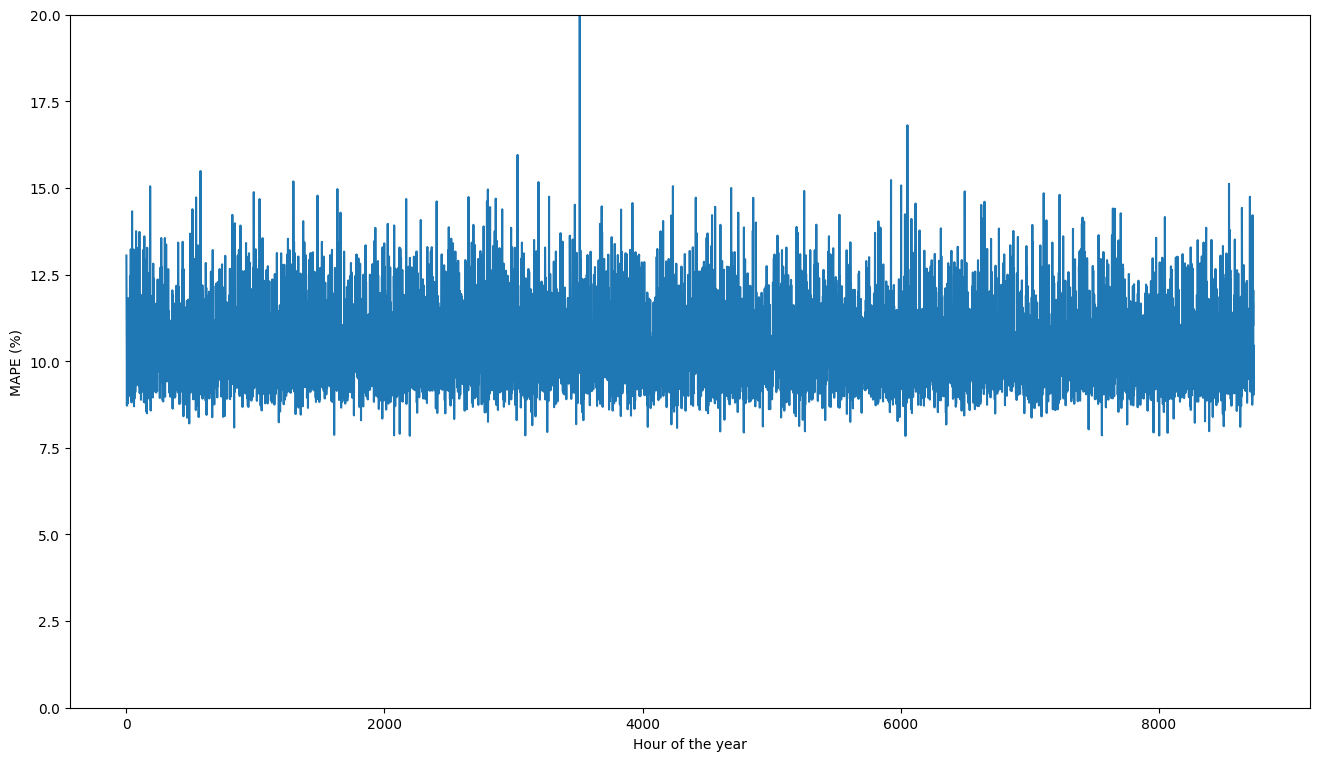

In [12]:
mape = np.abs(gt_2017_nn - pr_2017_nn) / np.abs(gt_2017_nn + 1e-6)
mape = np.mean(mape, axis=(1,2,3))
mape_all = np.mean(mape)
print(mape)
print(mape_all)

plt.figure(figsize=(16, 9))
plt.plot(mape*100, '.-', markersize=0.1)
plt.ylim([0, 20])
plt.ylabel('MAPE (%)')
plt.xlabel('Hour of the year')
